In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import pickle
import scipy.io as spio
import scipy.stats as sp
import mat73
import seaborn as sns
from scipy.special import factorial
from scipy.special import logsumexp
import matplotlib
import pandas as pd

from scipy import stats

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import replay_structure.structure_models as models
from replay_structure.run_snippet_preprocessing import Run_Snippet_Preprocessing
import replay_structure.metadata as meta
from replay_structure.utils import get_marginal_sum, get_p_models

from replay_structure.metadata import (
    Likelihood_Function,
    Model,
    Diffusion,
    Momentum,
    Stationary,
    Stationary_Gaussian,
    Random,
    Data_Type,
    string_to_data_type,
    string_to_model,
    Session_Indicator,
    string_to_session_indicator,
    string_to_likelihood_function,
)

In [39]:
pd.set_option('display.max_rows', None)

## load dynamics model results

In [4]:
bin_size_cm=5
time_window_ms=15

In [5]:
DATA_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = DATA_PATH+'/structure_analysis_input/Data4Pset_ripples_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'

In [6]:
with open(filename, "rb") as file_object:
    raw_data = file_object.read()
    mc_results = pickle.loads(raw_data)

In [211]:
mc_results.results_dataframe

,diffusion,momentum,stationary,stationary_gaussian,random,mll_model
0,-41.552481,-42.607107,-42.085101,-41.401338,-42.421778,stationary_gaussian
1,-57.927742,-59.020189,-57.853174,-58.165446,-61.612448,stationary
2,-126.740406,-127.338662,-167.520693,-138.219128,-135.141291,diffusion
3,-45.091940,-45.016429,-45.954521,-45.548904,-48.749530,momentum
4,-41.708810,-41.952578,-41.534081,-41.790942,-42.813049,stationary
5,-73.680783,-75.835012,-79.830926,-75.312957,-81.655305,diffusion
6,-39.965658,-40.221848,-39.578980,-40.103424,-42.052042,stationary
7,-88.374269,-90.847540,-87.945057,-88.512691,-97.131657,stationary
8,-49.006502,-48.463093,-51.934396,-49.456036,-51.938156,momentum
9,-69.746328,-70.571207,-74.203036,-71.212892,-72.094514,diffusion


In [40]:
mc_results.results_dataframe.to_pickle("mc_results.pkl")

AttributeError: 'Model_Comparison' object has no attribute 'to_pickle'

## results

In [41]:
p_rip_model = []
for i in range(294):
    p_rip_model.append(get_p_models(mc_results.results_dataframe[meta.MODELS_AS_STR].iloc[i].values))

In [42]:
mc_results.random_effects_results

{'gibbs': array([[0.26992406, 0.18209054, 0.27755162, 0.11517388, 0.1552599 ],
        [0.37117809, 0.27764004, 0.22596464, 0.05821567, 0.06700156],
        [0.38032052, 0.28242171, 0.16827512, 0.05792769, 0.11105497],
        ...,
        [0.38730083, 0.26532718, 0.20396383, 0.08260502, 0.06080314],
        [0.35541508, 0.37553255, 0.13038805, 0.0574716 , 0.08119272],
        [0.31165668, 0.41404751, 0.14620401, 0.0540871 , 0.0740047 ]]),
 'alpha_m': array([[117.,  89.,  82.,  27.,  29.],
        [127., 108.,  65.,  18.,  26.],
        [144.,  97.,  52.,  20.,  31.],
        ...,
        [122., 115.,  58.,  27.,  22.],
        [115., 146.,  42.,  23.,  18.],
        [102., 138.,  57.,  21.,  26.]]),
 'p_models': array([0.3337805 , 0.37605898, 0.14455415, 0.07845271, 0.06715366]),
 'p_exceedance': array([0.33111111, 0.66888889, 0.        , 0.        , 0.        ])}

In [43]:
# calculate mean/sd p(M|X) across sessions
p_models = mc_results.random_effects_results["p_models"]
    
p_models_mean = np.mean(p_models, axis=0)
p_models_sd = np.std(p_models, axis=0)

# print p(M|X) mean and sd
for i, model in enumerate(meta.MODELS_AS_STR):
    print(f"{model} model: {np.round(p_models[i]*100, 1)}%")

# print p(M|X) grouped by trajectory/non-trajectory models
print("\n")
sum_trajectory = np.sum(p_models[:2])*100
sum_nontrajectory = np.sum(p_models[2:])*100
print(f"trajectory models: {np.round(np.mean(sum_trajectory), 1)}%")
print(f"non-trajecotry models: {np.round(np.mean(sum_nontrajectory), 1)}%")

diffusion model: 33.4%
momentum model: 37.6%
stationary model: 14.5%
stationary_gaussian model: 7.8%
random model: 6.7%


trajectory models: 71.0%
non-trajecotry models: 29.0%


In [58]:
percent_trajectory_model_mean = mc_results.random_effects_results["p_models"][[0,1]].sum()
percent_trajectory_model_mean

0.7098394867966

In [56]:
percent_significant_ripples_mean = len(replaydata['replay01_data']['id'])/296
percent_significant_ripples_mean

0.27702702702702703

In [64]:
percent_significant_ripples_mean2 = len(replaydata['replay05_data']['id'])/296
percent_significant_ripples_mean2

0.46959459459459457

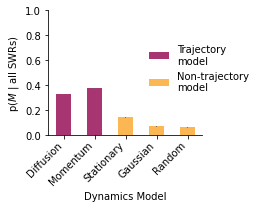

In [194]:
fig, ax = plt.subplots(1,1, figsize=(3,3))

x_axis = np.arange(meta.N_MODELS)+.5
temporal_model_colors = {True: '#9e1f63', False: '#fbb040'}
model_colors = [temporal_model_colors[model.trajectory] for model in meta.MODELS]



i = 0
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xticks(x_axis)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_xlim([0,meta.N_MODELS-.05])
ax.tick_params(axis='y')
ax.set_ylabel("p($M$ | all SWRs)")
ax.set_xlabel("Dynamics Model")
ax.set_ylim([0,1])
ax.tick_params(axis='x', pad=.7)

custom_patches = [matplotlib.patches.Patch(facecolor=temporal_model_colors[True], alpha=.9,label='Trajectory\nmodel'),
               matplotlib.patches.Patch(facecolor=temporal_model_colors[False], alpha=.9,label='Non-trajectory\nmodel'),
              ]
ax.legend(
    handles=custom_patches, 
    bbox_to_anchor=(0.6, 0.8, 0, 0),
    ncol=1,
    frameon=False)

ax.bar(x_axis, p_models,
        width=.5, color=model_colors, alpha=.9)

ax.scatter(x_axis+(np.random.rand()-.5)/8, p_models, s=5, color='dimgray', zorder=100, marker='.', linewidths=0)
plt.tight_layout()
plt.savefig('fig/dymoall', dpi=500,  bbox_inches='tight')

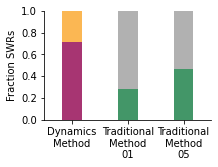

In [76]:
previous_classification_colors = {'classified': 'seagreen', 'not_classified': 'darkgray'}
temporal_model_colors = {True: '#9e1f63', False: '#fbb040'}


fig, ax = plt.subplots(1,1, figsize=(3,2))

x_axis = np.arange(3) + .5

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis='y')
ax.set_xticks(x_axis)
ax.set_xticklabels(["Dynamics\nMethod", "Traditional\nMethod\n01", "Traditional\nMethod\n05"], ha='center')
ax.set_xlim([0,3])
ax.set_ylabel("Fraction SWRs")
ax.set_ylim([0,1])

bar_width = .35
alpha=.9

ax.bar(x_axis, [percent_trajectory_model_mean, percent_significant_ripples_mean, percent_significant_ripples_mean2], 
          width=bar_width, color=[temporal_model_colors[True], previous_classification_colors['classified'], previous_classification_colors['classified']], alpha=alpha, error_kw=dict(lw=.8, zorder=101))
ax.bar(x_axis, [1-percent_trajectory_model_mean, 1-percent_significant_ripples_mean, 1-percent_significant_ripples_mean2], bottom=[percent_trajectory_model_mean, percent_significant_ripples_mean,percent_significant_ripples_mean2], 
          width=bar_width, color=[temporal_model_colors[False], previous_classification_colors['not_classified'], previous_classification_colors['not_classified']], alpha=alpha)

custom_lines_1 = [matplotlib.lines.Line2D([0], [0], color=temporal_model_colors[True], lw=4, linestyle='--', alpha=alpha),
               matplotlib.lines.Line2D([0], [0], color=temporal_model_colors[False], lw=4, linestyle='--', alpha=alpha)]

custom_lines_2 = [matplotlib.lines.Line2D([0], [0], color=previous_classification_colors['classified'], lw=4, linestyle='--', alpha=alpha),
                matplotlib.lines.Line2D([0], [0], color=previous_classification_colors['not_classified'], lw=4, linestyle='--', alpha=alpha)]


'''leg_1 = ax.legend(
    handles=custom_lines_2, 
    labels=['Previously\nclassified\ntrajectory', 'Not\nclassified'],
    bbox_to_anchor=(1.3, -.3, 0, 0),
    ncol=1,
    frameon=False,
    labelspacing=.8)
leg_2 = ax.legend(
    handles=custom_lines_1, 
    labels=['Trajectory\nmodel', 'Non-trajectory\nmodel'],
    bbox_to_anchor=(.6, -.35, 0, 0), 
    ncol=1,
    frameon=False,
    labelspacing=.8)
ax.add_artist(leg_1)'''
plt.savefig('fig/dymocomp', dpi=500,  bbox_inches='tight')

In [52]:
ripple_selection_ind = [3, 8, 12, 23, 39, 46, 57, 71, 78, 89, 102, 112, 127, 147, 197, 204, 250, 280, 285]

/home/katharina/Documents/Studium/MIT/project/1D/replay_structure/utils.py:281: RuntimeWarning: divide by zero encountered in log
  marginal_plot = np.log(marginal_norm)


Text(0, 0.5, 'momentum ')

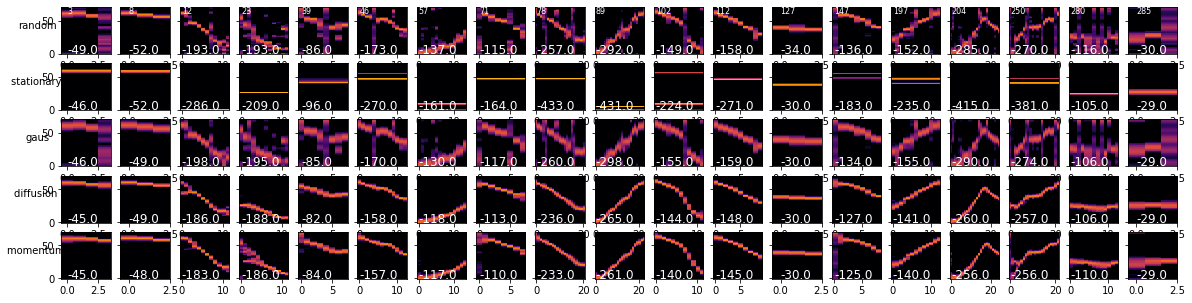

In [55]:
fig, ax = plt.subplots(5,len(ripple_selection_ind), figsize=(20,5), sharey=True)
for i, spikemat_ind in enumerate(ripple_selection_ind):
    random = models.Random(structure_data).get_spikemat_marginals(spikemat_ind)
    if random is not np.nan:
        marginal_plot = get_marginal_sum(random)
        ax[0,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[0,i].text(0, 0, str(model_evidences['random'][spikemat_ind].round()), fontsize=12, color='white')
        ax[0,i].text(0, 60, str(spikemat_ind), fontsize=8, color='white')
    stat = models.Stationary(structure_data).get_spikemat_marginals(spikemat_ind)
    if stat is not np.nan:
        stat = np.tile(stat,(structure_data.spikemats[spikemat_ind].shape[0],1))
        marginal_plot = get_marginal_sum(stat.T)
        ax[1,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[1,i].text(0, 0, str(model_evidences['stationary'][spikemat_ind].round()), fontsize=12, color='white')
    gaus = models.Stationary_Gaussian(structure_data, 0.1).get_spikemat_marginals(spikemat_ind)
    if gaus is not np.nan:
        marginal_plot = get_marginal_sum(gaus)
        ax[2,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[2,i].text(0, 0, str(model_evidences['stationary_gaussian'][spikemat_ind].round()), fontsize=12, color='white')
    diffusion = models.Diffusion(structure_data, 0.85).get_spikemat_marginals(spikemat_ind)
    if diffusion is not np.nan:
        marginal_plot = get_marginal_sum(diffusion)
        ax[3,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[3,i].text(0, 0, str(model_evidences['diffusion'][spikemat_ind].round()), fontsize=12, color='white')
    momentum = models.Momentum(structure_data, 1, 90, 80, plotting=True).get_spikemat_marginals(spikemat_ind)
    if momentum is not np.nan:
        marginal_plot = get_marginal_sum(momentum)
        ax[4,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[4,i].text(0, 0, str(model_evidences['momentum'][spikemat_ind].round()), fontsize=12, color='white')
ax[0,0].set_ylabel('random', rotation=0)
ax[1,0].set_ylabel('stationary ', rotation=0)
ax[2,0].set_ylabel('gaus', rotation=0)
ax[3,0].set_ylabel('diffusion ', rotation=0)
ax[4,0].set_ylabel('momentum ', rotation=0)

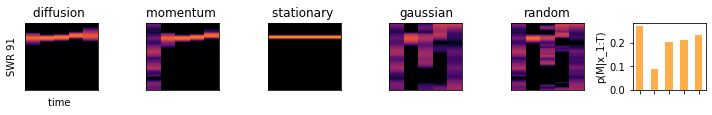

In [225]:
spikemat_ind = 91

fig, ax = plt.subplots(1,6, figsize=(10,1.7), sharey=False)

random = models.Random(structure_data).get_spikemat_marginals(spikemat_ind)
if random is not np.nan:
    marginal_plot = get_marginal_sum(random)
    ax[4].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
stat = models.Stationary(structure_data).get_spikemat_marginals(spikemat_ind)
if stat is not np.nan:
    stat = np.tile(stat,(structure_data.spikemats[spikemat_ind].shape[0],1))
    marginal_plot = get_marginal_sum(stat.T)
    ax[2].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
gaus = models.Stationary_Gaussian(structure_data, 0.1).get_spikemat_marginals(spikemat_ind)
if gaus is not np.nan:
    marginal_plot = get_marginal_sum(gaus)
    ax[3].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
diffusion = models.Diffusion(structure_data, 0.85).get_spikemat_marginals(spikemat_ind)
if diffusion is not np.nan:
    marginal_plot = get_marginal_sum(diffusion)
    ax[0].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
momentum = models.Momentum(structure_data, 1, 90, 80, plotting=True).get_spikemat_marginals(spikemat_ind)
if momentum is not np.nan:
    marginal_plot = get_marginal_sum(momentum)
    ax[1].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')

x_ticks = np.arange(meta.N_MODELS) +.5
ax[5].set_xticks(x_ticks)
ax[5].bar(x_ticks, p_rip_model[spikemat_ind], width=.5, color='darkorange', alpha=.7)
ax[5].set_xticklabels(['', '', '', '', ''])

ax[5].set_ylabel('p(M|x_1:T)')
for i in range(5):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[4].set_title('random', rotation=0)
ax[0].set_ylabel('SWR '+str(spikemat_ind))
ax[2].set_title('stationary ', rotation=0)
ax[3].set_title('gaussian', rotation=0)
ax[0].set_title('diffusion ', rotation=0)
ax[0].set_xlabel('time ', rotation=0)
ax[1].set_title('momentum ', rotation=0)

plt.tight_layout()
#plt.savefig('fig/dymo278', dpi=500, transparent=True)

# for running directoin

In [ ]:
spikemat_ind = 169

fig, ax = plt.subplots(1,6, figsize=(10,1.7), sharey=False)

random = models.Random(structure_data).get_spikemat_marginals(spikemat_ind)
if random is not np.nan:
    marginal_plot = get_marginal_sum(random)
    pos = marginal_plot[:71,:]
    neg = marginal_plot[71:,:]
    ax[4].imshow(pos, aspect='auto', origin='lower', cmap='Reds', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
    ax[4].imshow(neg, aspect='auto', origin='lower', cmap='Blues', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
stat = models.Stationary(structure_data).get_spikemat_marginals(spikemat_ind)
if stat is not np.nan:
    stat = np.tile(stat,(structure_data.spikemats[spikemat_ind].shape[0],1))
    marginal_plot = get_marginal_sum(stat.T)
    pos = marginal_plot[:71,:]
    neg = marginal_plot[71:,:]
    ax[2].imshow(pos, aspect='auto', origin='lower', cmap='Reds', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
    ax[2].imshow(neg, aspect='auto', origin='lower', cmap='Blues', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
gaus = models.Stationary_Gaussian(structure_data, 0.1).get_spikemat_marginals(spikemat_ind)
if gaus is not np.nan:
    marginal_plot = get_marginal_sum(gaus)
    pos = marginal_plot[:71,:]
    neg = marginal_plot[71:,:]
    ax[3].imshow(pos, aspect='auto', origin='lower', cmap='Reds', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
    ax[3].imshow(neg, aspect='auto', origin='lower', cmap='Blues', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
diffusion = models.Diffusion(structure_data, 0.85).get_spikemat_marginals(spikemat_ind)
if diffusion is not np.nan:
    marginal_plot = get_marginal_sum(diffusion)
    pos = marginal_plot[:71,:]
    neg = marginal_plot[71:,:]
    ax[0].imshow(pos, aspect='auto', origin='lower', cmap='Reds', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
    ax[0].imshow(neg, aspect='auto', origin='lower', cmap='Blues', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
momentum = models.Momentum(structure_data, 1, 90, 80, plotting=True).get_spikemat_marginals(spikemat_ind)
if momentum is not np.nan:
    marginal_plot = get_marginal_sum(momentum)
    pos = marginal_plot[:71,:]
    neg = marginal_plot[71:,:]
    ax[1].imshow(pos, aspect='auto', origin='lower', cmap='Reds', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')
    ax[1].imshow(neg, aspect='auto', origin='lower', cmap='Blues', alpha=0.6, vmin=np.log(.001), vmax=np.log(4), interpolation='none')

x_ticks = np.arange(meta.N_MODELS) +.5
ax[5].set_xticks(x_ticks)
ax[5].bar(x_ticks, p_rip_model[spikemat_ind], width=.5, color='darkorange', alpha=.7)
ax[5].set_xticklabels(['', '', '', '', ''])

ax[5].set_ylabel('p(M|x_1:T)')
for i in range(5):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[4].set_title('random', rotation=0)
ax[0].set_ylabel('SWR '+str(spikemat_ind))
ax[2].set_title('stationary ', rotation=0)
ax[3].set_title('gaussian', rotation=0)
ax[0].set_title('diffusion ', rotation=0)
ax[0].set_xlabel('time ', rotation=0)
ax[1].set_title('momentum ', rotation=0)

plt.tight_layout()
plt.savefig('fig/dymord169', dpi=500, transparent=True)